# 第5部　正規線形モデル｜Pythonで学ぶ統計学入門

## 1章　1つの連続型の説明変数を持つモデル

正規線形モデルをPythonで推定していく。
最初は連続型の説明変数が1つだけある正規線形モデルを対象とする。これは単回帰モデルとも呼ばれます。

### 分析の準備

In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

/Users/kaito/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 実装：データの読み込みと図示

In [2]:
# データの読み込み
beer = pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


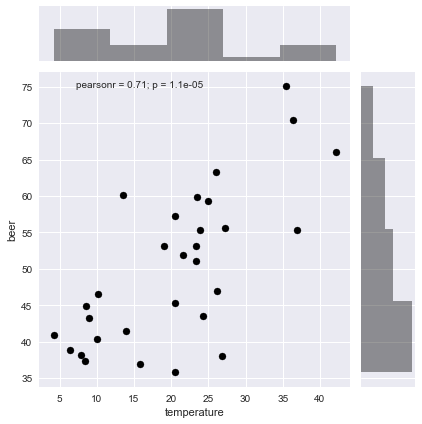

In [3]:
# 図示
sns.jointplot(x = "temperature", y = "beer", 
              data = beer, color = 'black')

分析の第一ステップとして、可視化してデータの特徴をつかみましょう。

pearsonr=0.71で、図から気温（横軸）とビールの売上（縦軸）との間で正の相関がみられる。

### 実装：statsmodelsによるモデル化

$$ビールの売上\ \tilde \ \ \ \ \cal{N}(\beta_0 + \beta_1 \times 気温\ ,\ \sigma^2)$$

応答変数にビールの売上を、説明変数に気温を用いた正規線形モデル。

推定するパラメータとしては式にある係数$\beta_0$：切片と$\beta_1$：傾きを推定する。ただし、$\sigma^2$は局外パラメータ（分散は平均から計算可能）なので無視する。


ここで、モデルを構築するメリットのおさらい
* 現象の解釈ができる
    * 係数$\beta_1$が0でないと判断できれば、「ビールの売上は気温の影響を受けている」と判断できる
    * 係数$\beta_1$の正負が分かれば「気温が上がることによって、ビールの売上が上がるのか下がるのか」を判断できる
* 予測ができる
    * 気温$t$のときはビールの売上は$\beta_0 + \beta_1 \times t$になると予測できる

In [4]:
# モデルの構築
# 母集団分布に正規分布を仮定したときの最尤法は最小二乗法の結果と一致する（第4部より）
lm_model = smf.ols(formula = "beer ~ temperature", # OLSは通常の最小二乗法（Ordinary Least Squares）の略
                   data = beer).fit() # fitでパラメータ推定

### 実装：推定結果の表示と係数の検定

In [5]:
# 推定結果の表示
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Mon, 07 Jan 2019   Prob (F-statistic):           1.11e-05
Time:                        19:12:39   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

まずは中央部のInterceptやtemperatureと書かれた箇所のみに注目する。

In [6]:
# 中央部分のみに注目
lm_model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.6102,3.235,10.699,0.000,27.984,41.237
temperature,0.7654,0.144,5.334,0.000,0.471,1.059


$$ビールの売上\ \tilde \ \ \ \ \cal{N}(\beta_0 + \beta_1 \times 気温\ ,\ \sigma^2)\ \ \ (再掲)$$

Intercept(切片)とtemperatureが$\beta_0$と$\beta_1$に当たる。

* coef : 係数の値そのもの
* std err : 係数の標準誤差
* t : $t$値
* P>|t| : 帰無仮説を「係数の値が0である」としたときの$p$値
* [0.025	0.975] : 95%信頼区間における下側信頼限界と上側信頼限界

$p$値から、気温にかかる係数は有意に0とは異なると判断できる（$p$値があまりにも小さすぎて、桁落ちで0となっている）→　気温がビールの売上に影響を与えることがわかる。

係数temperatureの値が0.7654であることから、「気温が上がるとビールの売上が上がる」と解釈できる。

この程度の解釈であれば冒頭で示した散布図からもわかるが、説明変数が増えるなどして複雑なモデルになると、モデルを構築してその係数を見たほうが、解釈が簡単になる（**モデルを構築するメリット：現象の解釈ができる**）。

summary関数の出力の意味を確認していく。

最下段は後ほどモデルの評価の際に確認することとして、ここでは最上段を解説する。

In [7]:
# summary関数の出力の説明（最上段）
lm_model.summary().tables[0]

Dep. Variable:,beer,R-squared:,0.504
Model:,OLS,Adj. R-squared:,0.486
Method:,Least Squares,F-statistic:,28.45
Date:,"Mon, 07 Jan 2019",Prob (F-statistic):,1.11e-05
Time:,19:15:15,Log-Likelihood:,-102.45
No. Observations:,30,AIC:,208.9
Df Residuals:,28,BIC:,211.7
Df Model:,1,,
Covariance Type:,nonrobust,,


* Dep.Variable : 応答変数の名称。DepはDependedで従属変数という意味
* Model・Method : OLSと書かれているのは通常の最小二乗法を用いたという説明
* Date・Time : モデルが推定された日時
* No.Observations : サンプルサイズ
* Df Residuals : サンプルサイズから「推定されたパラメータ数」を引いたもの
* Df Model : 用いられた説明変数の数
* Covariance Type : 共分散のタイプ。特に指定しなければnonrubstになる
* R-Squared・Adj.R-Squared : 決定係数と自由度調整済み決定係数（後述）
* F-statistic・Prob (F-statistic) : 分散分析の結果（次章で解説）
* Log-Likelihood : 最大化対数尤度
* AIC : 赤池情報規準（$-2 \times (最大化対数尤度 - 推定されたパラメータ数)$）
* BIC : ベイズ情報規準（$−2 \times 最大化対数尤度 + 推定されたパラメータ数 \times \log(サンプルサイズ)$）

### 実装：AICによるモデル選択

続いて、AICによるモデル選択を行う。

説明変数が1つしかないため、NullモデルのAICと気温という説明変数が入ったモデルのAICを比較することで、モデル選択を行う。

In [8]:
# NULLモデル
null_model = smf.ols("beer ~ 1", data = beer).fit() # 説明変数がないときは"beer ~ 1"と指定する

In [9]:
# NULLモデルのAIC
null_model.aic

227.942

In [10]:
# 説明変数入りのモデルのAIC
lm_model.aic

208.909

説明変数入りモデルの方が小さなAICとなったので、「気温という説明変数があった方が、予測精度が高くなるのではないか」と判断されることになる。

ここで、AICの計算方法の復習をする。AICは、
$$-2 \times (最大化対数尤度 - 推定されたパラメータ数)$$
で求められる。

最大化対数尤度は`lm_model.llf`、用いられた説明変数の数は`lm_model.df_model`で取得できる。

今回は、用いた説明変数の数はtemperatureのみ。しかし、実際に推定されたパラメータには切片$\beta_0$も含まれるので、`lm_model.df_model`に1を足してAICを計算する。

In [11]:
# AIC
-2*(lm_model.llf - (lm_model.df_model + 1))

208.909

#### メモ：AIC算出にはいくつか流儀がある

「推定されたパラメータ数」にはいくつかの流儀がある。
今回は、局外パラメータをパラメータの個数に含まなかったが、これを含めてAICを求める場合もある（この場合はAICが210.909となる）。
R言語など他のツールでは局外パラメータの数が含まれていることもある。

AICはその値の大小に興味がある指標である。同じ流儀で計算されている限り、AICの大小関係は崩れないので、モデル選択において悪影響はない。
ただし、他のツールやライブラリ間でAICを比較することは避けたほうがいい。

### 回帰直線

回帰直線とは、モデルによる応答変数の推測値を直線で示したもの。

応答変数が連続型の変数であった場合は「回帰」と呼ぶ伝統があるのでその名前が使われる。非線形なモデルの場合は「回帰曲線」と呼ばれることもある。

### 実装：seabornによる回帰直線の図示

/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


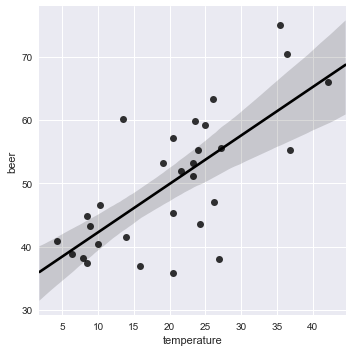

In [12]:
# 散布図に回帰直線を加えたグラフ
# 網掛け部分は回帰直線の95%信頼区間を表している
sns.lmplot(x = "temperature", y = "beer", data = beer, # lmplotは、*l*inear regression *m*odel *plot*の略？
           scatter_kws = {"color": "black"}, # 散布図のデザインの指定
           line_kws    = {"color": "black"}) # 回帰直線のデザインの指定

### 実装：モデルによる予測

推定されたモデルに対して`predict`関数を適用することで予測ができる。

引数になにも指定しなかった場合は、訓練データへの当てはめ値がそのまま出力される。

In [13]:
# 当てはめ値
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

気温の値をデータフレームの形式で指定して予測を行うこともできる。

In [14]:
# 気温が0度のときのビールの売上の期待値を予測。切片の推定値（34.6102）と一致する。
lm_model.predict(pd.DataFrame({"temperature":[0]}))

0    34.610215
dtype: float64

### 実装：残差の取得

モデルの評価方法を説明する。
本来は予測を行う前にモデルの評価をしておくとよいでしょう。

モデルの評価は主に残差のチェックを通して行われる。
正規線形モデルの場合は、残差が平均0の正規分布に従うはずなので、そのとおりになっているかをチェックする（時系列データを予測するときにも残差のチェックは行われる）。

残差の分布の確認は後述。

In [15]:
# 残差の取得
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [16]:
# 残差の平均はほぼ0になっている。
resid.mean()

-0.000

理解を深めるため、別途計算する。

残差は$\ \ residuals = y - \hat{y}\ \ $で求められる。
ただし、$\hat{y}\ =\ \beta_0 + \beta_1 \times 気温$

まずは当てはめ値$\ \hat{y}\ $を計算する。
これは、`lm_model.fittedvalues`や`lm_model.predict()`（引数になにも指定しなかった場合は、訓練データへの当てはめ値がそのまま出力する）としても同じ。

In [17]:
# 愚直に当てはめ値の計算
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]

y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [18]:
# 当てはめ値の取得
lm_model.fittedvalues.head(3)

0    50.301481
1    53.745905
2    42.264491
dtype: float64

In [19]:
# 手計算で残差を求める
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

### 決定係数

summary関数の出力にあるR-squaredは決定係数と呼ばれる指標で、「手持ちのデータへのモデルの当てはまりの度合いを評価した指標」。

$y$を応答変数、$\ \hat{y}\ $をモデルによる推測値、$\mu$を$y$の平均値としたとき、決定係数は以下のように計算される。

$$R^2 = \frac{\sum_{i=1}^N (\hat{y_i} - \mu)^2}{\sum_{i=1}^N (y_i - \mu)^2}$$

モデルによる推測値が応答変数の実際の値と一致していれば、$R^2$は1になる。

補足として、決定係数の意味するところを確認する。

残差は「$\ residuals = y - \hat{y}\ $」で計算される。式変形すると、「$\ y = \hat{y} + residuals \ $」となる。
決定係数の分母$\sum_{i=1}^N (y_i - \mu)^2$は以下のように分解することができる。

$$\sum_{i=1}^N (y_i - \mu)^2 = \sum_{i=1}^N (\hat{y_i} - \mu)^2 + \sum_{i=1}^N residuals^2 \cdots (*)$$

これは、応答変数の変動の大きさ$\sum_{i=1}^N (y_i - \mu)^2$をモデルで説明できた変動とモデルで説明できなかった残差平方和で分けることができるということ。
このため、決定係数は「全体の変動の大きさに占める、モデルで説明できた変動の割合」と解釈される。

この関係があるため、決定係数は以下のようしても表すことができる。

$$R^2 = \frac{\sum_{i=1}^N (y_i - \mu)^2 - \sum_{i=1}^N residuals^2}{\sum_{i=1}^N (y_i - \mu)^2} = 1 - \frac{\sum_{i=1}^N residuals^2}{\sum_{i=1}^N (y_i - \mu)^2}$$


図にしてわかりやすいと思った決定係数の解説は[27-4. 決定係数と重相関係数 | 統計学の時間 | 統計WEB](https://bellcurve.jp/statistics/course/9706.html)。

### 実装：決定係数

In [20]:
# 決定係数
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

sp.sum((yhat - mu)**2) / sp.sum((y - mu)**2)

0.504

In [21]:
# 以下のように取得できる
lm_model.rsquared

0.504

念のため、「応答変数の変動の大きさ$\sum_{i=1}^N (y_i - \mu)^2$をモデルで説明できた変動とモデルで説明できなかった残差平方和で分けることができる」ことをPythonで確かめる。

In [22]:
# (*)の右辺
sp.sum((yhat - mu)**2) + sum(resid**2)

3277.115

In [23]:
# (*)の左辺
sp.sum((y - mu)**2)

3277.115

### 自由度調整済み決定係数

説明変数の数が増えるという罰則を組み込んだ決定係数を自由度調整済み決定係数と呼ぶ。

決定係数は説明変数の数を増やせば増やすほどに大きな値になる。決定係数を高めることにこだわると過学習を起こすため、調整が必要となる（「不要な説明変数を加えても当てはめ精度は高くなるが、予測精度は不要な説明変数を除くことで高くなることが知られている」第4部：変数選択の意義より）。

自由度調整済み決定係数は以下のように計算される。ただし、$s$は説明変数の数。

$$R^2 = 1 - \frac{\sum_{i=1}^N residuals^2 / (N-s-1)}{\sum_{i=1}^N (y_i - \mu)^2 / (N-1)}$$

### 実装：自由度調整済み決定係数

In [24]:
# 式を実装
n = len(beer.beer)
s = 1
1 - ((sp.sum(resid**2) / (n - s - 1)) / 
    (sp.sum((y - mu)**2) / (n - 1)))

0.486

In [25]:
# statsmodelsを使う
lm_model.rsquared_adj

0.486

### 実装：残差の図示

残差の特徴をつかむ最も簡単な方法は、残差のヒストグラムを描くこと。

ヒストグラムを見て、正規分布の特徴を持っているかを目で確認する。

/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


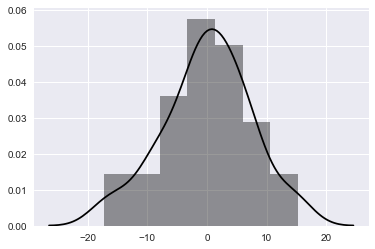

In [26]:
# 残差のヒストグラム
sns.distplot(resid, color = 'black')

見た感じ、左右対称で正規分布に従っているように見える。

次に、X軸に当てはめ値、Y軸に残差をおいた散布図をプロットする。

これが完全にランダムであり、相関もないことを確認する。

/Users/kaito/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


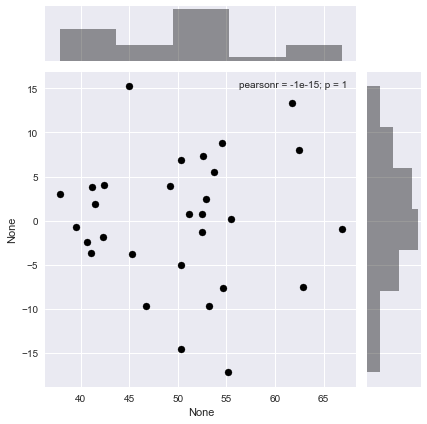

In [27]:
# 残差の散布図
sns.jointplot(lm_model.fittedvalues, resid, 
              joint_kws={"color": "black"}, 
              marginal_kws={"color": "black"})

### 実装：Q-Qプロット

理論上の分位点と実際のデータの分位点を散布図としてプロットしたグラフを**Q-Qプロット**と呼ぶ。(QはQuantile、分位点の略)

（復習）データを小さいものから順に並べたときに25%の位置にあるデータを第一四分位数、75%の位置にあるデータを第三四分位数というもの。

正規分布の理論上の分位点と実際のデータの分位点を求めて、両者を比較することで残差が正規分布に近いかを比較する目的でQ-Qプロットを使う。

### 実装：Q-Qプロット

Q-Qプロットはsm.qqplot関数を使うことで作成できる。`line = "s"`と指定することで「残差が正規分布に従っていればこの線上にポイントされる」という目安を図示してくれる。

今回は綺麗にデータが線上に乗っているので問題なさそう。

（Q-Qプロットの自作はスキップする）

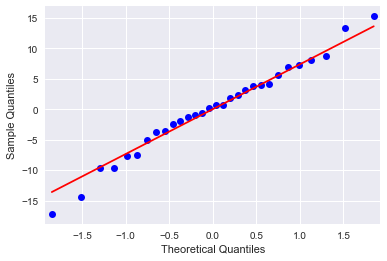

In [28]:
# Q-Qプロット
fig = sm.qqplot(resid, line = "s")

### summary関数の出力で見る残差のチェック

残差のチェック結果はsummary関数で出力される。
結果は最下段の表に注目する。

Prob(Omnibus)、Prob(JB)が残差の正規性の検定結果を示す。

* 帰無仮説：残差は正規分布に従っている
* 対立仮説：残差は正規分布と異なる

この$p$値が0.05よりも大きいことを確認する。検定の非対称があるので$p$値が0.05よりも大きかったとしても「正規分布である」と主張ができないことに注意。こういった検定は「明らかな問題があるかどうか」を判断するもの。

正規分布と異なっているか否かを判断する際に、Skew（歪度、わいど）やKurtosis（尖度、せんど）といった指標を用いる。

* 歪度：ヒストグラムの左右非対称さの方向とその程度を測る指標。0よりも大きければ右の裾が長くなる。正規分布は左右対称なのでこの値が0となる。
* 尖度：ヒストグラムの中心の周辺の部分の尖り度合いを測る指標。値が大きいほど尖っていることになる。正規分布の尖度は3となっている。

$$Skew = E(\frac{(x - \mu)^3}{\sigma^3})$$
$$Kurtosis = E(\frac{(x - \mu)^4}{\sigma^4})$$

Durbin-Watsonは残差の自己相関をチェックする指標。およそ2前後であれば問題ないと判断される。
特に時系列データを対象とした分析をする場合は、必ず Durbin-Watsonが2前後であることをチェックする。

残差に自己相関があると、係数の$t$検定の結果などが信用できなくなってしまう。この問題を**見せかけの回帰**と呼ぶ。Durbin-Watson統計量が2よりも大きくずれていれば、一般化最小二乗法などの使用を検討する必要がある。

In [29]:
# 推定結果の表示
lm_model.summary().tables[2]

Omnibus:,0.587,Durbin-Watson:,1.960
Prob(Omnibus):,0.746,Jarque-Bera (JB):,0.290
Skew:,-0.240,Prob(JB):,0.865
Kurtosis:,2.951,Cond. No.,52.5
